##Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

##Dataset

In [3]:
df=pd.read_csv("heart .csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##Univariate Analysis

<Axes: xlabel='age', ylabel='count'>

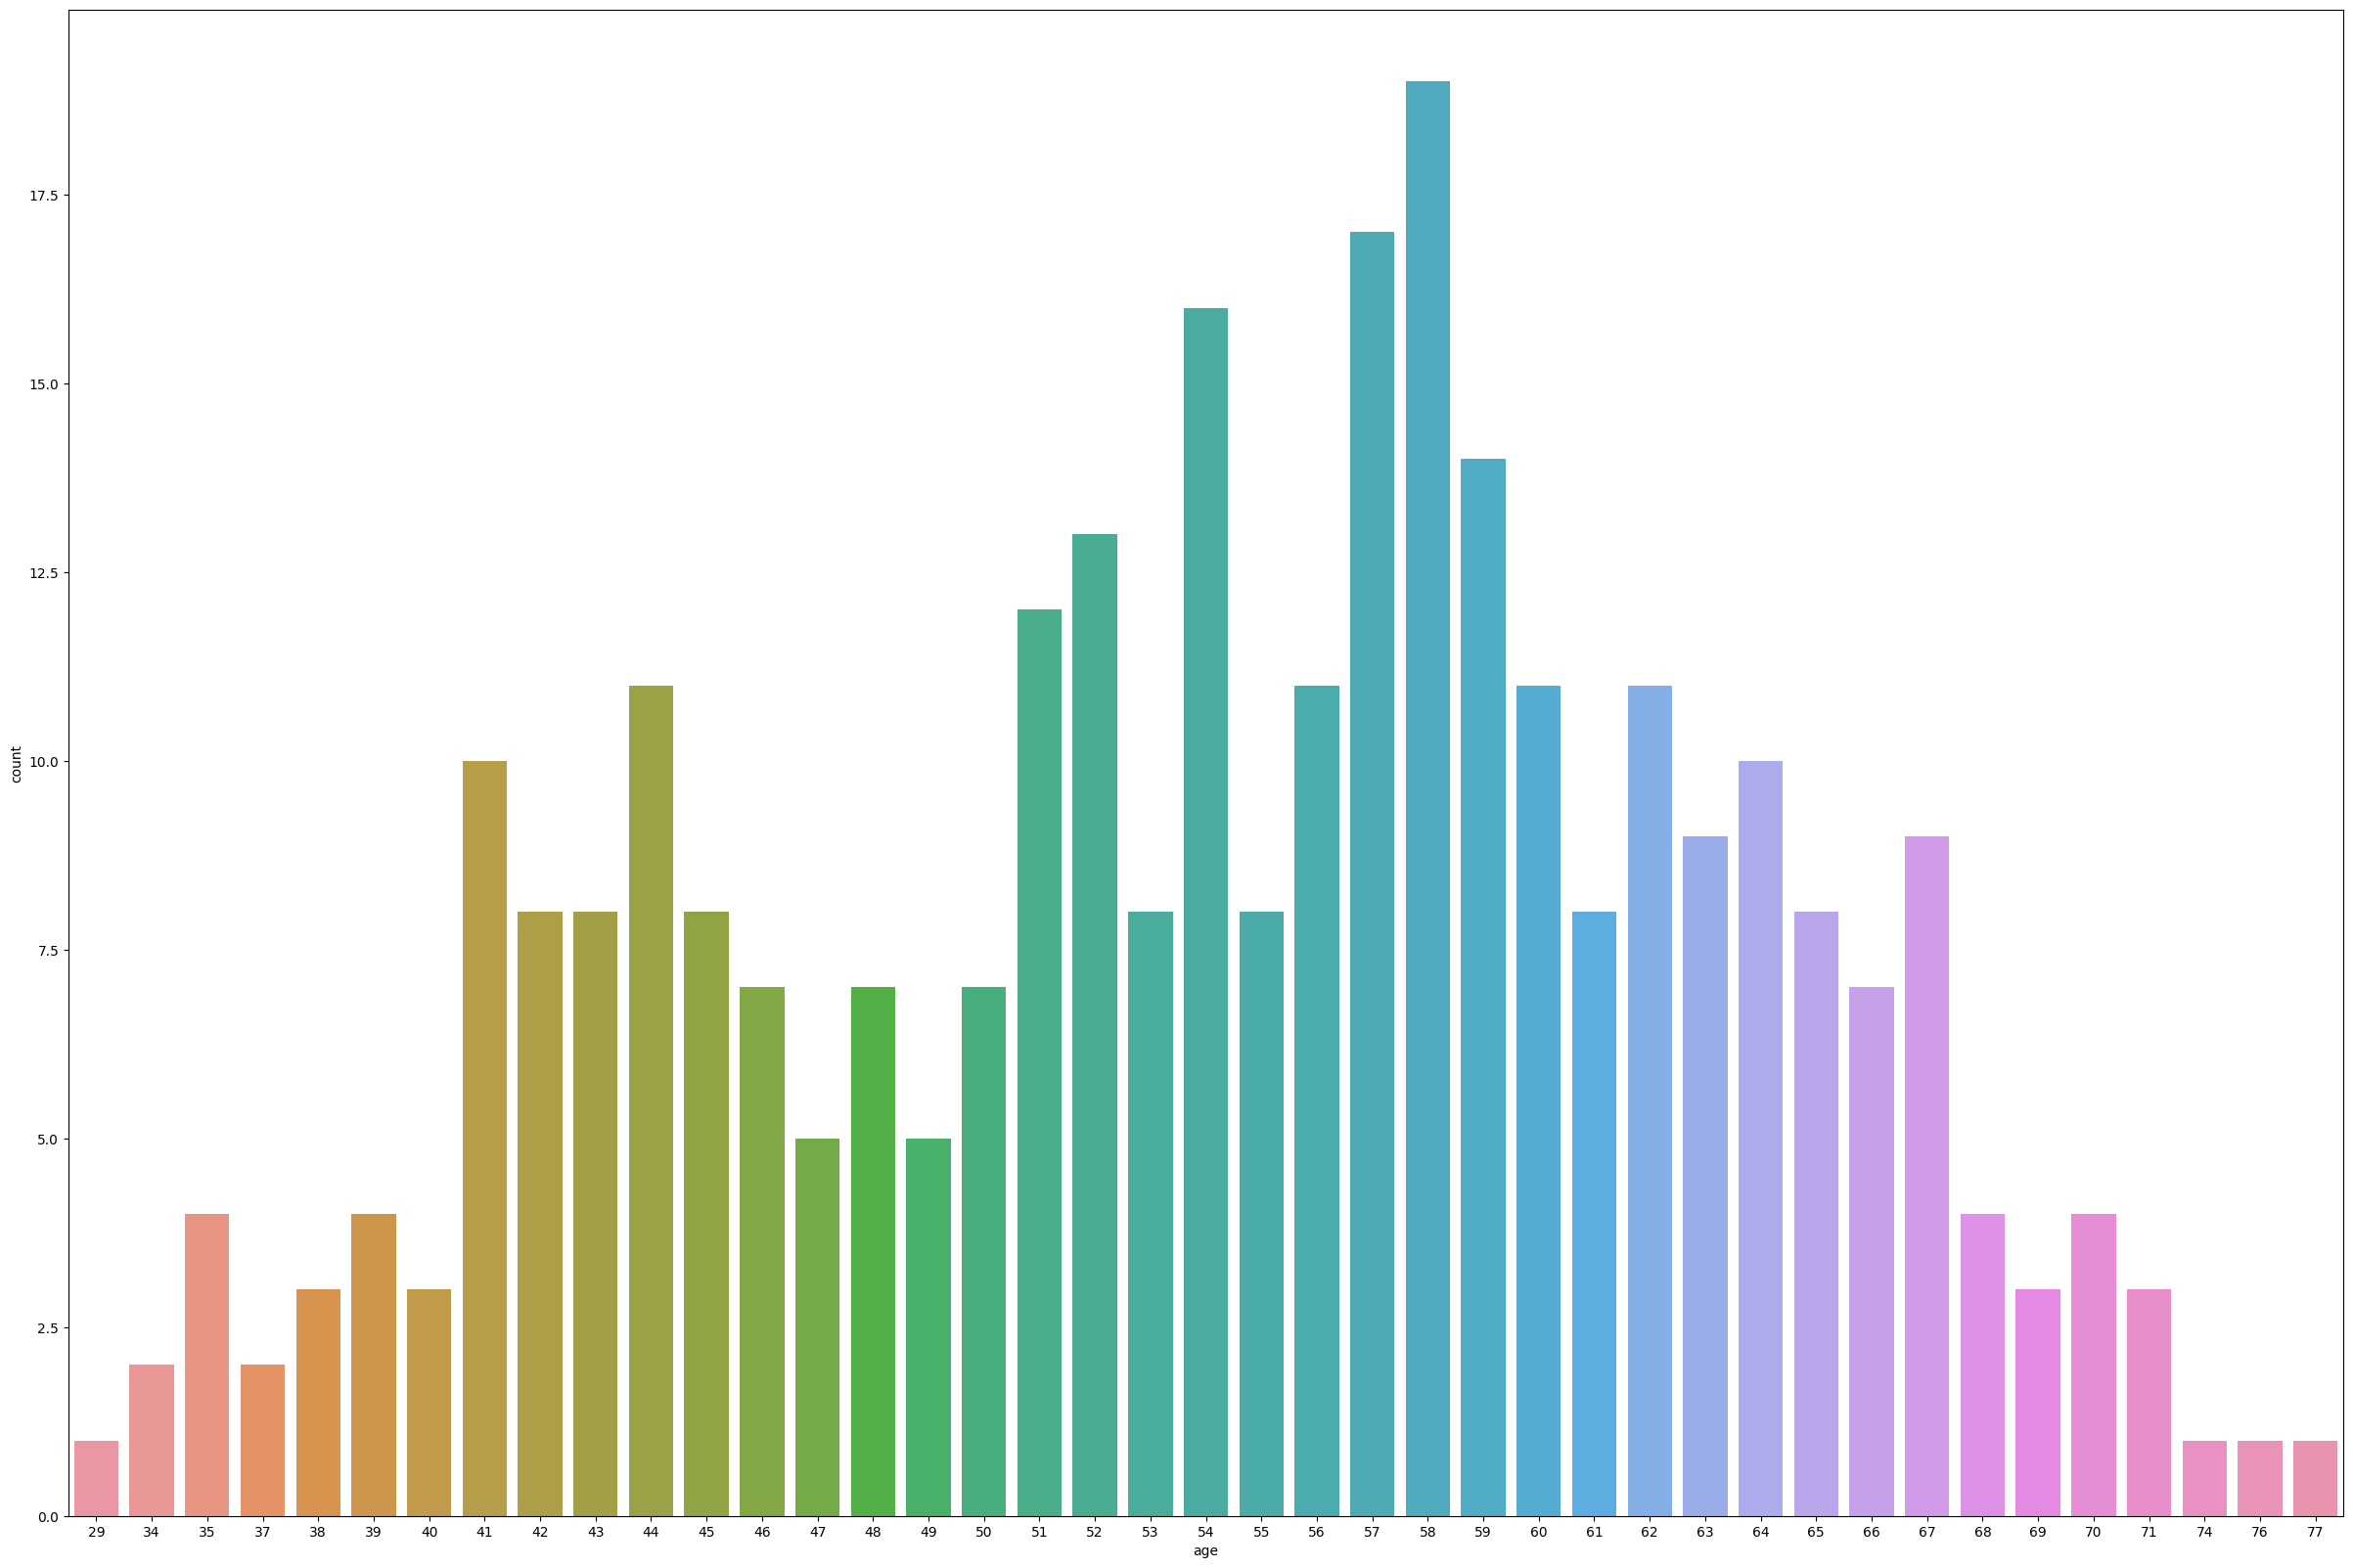

In [12]:
plt.figure(figsize=(30,20))
sns.countplot(x="age",data=df)

<Axes: xlabel='sex', ylabel='count'>

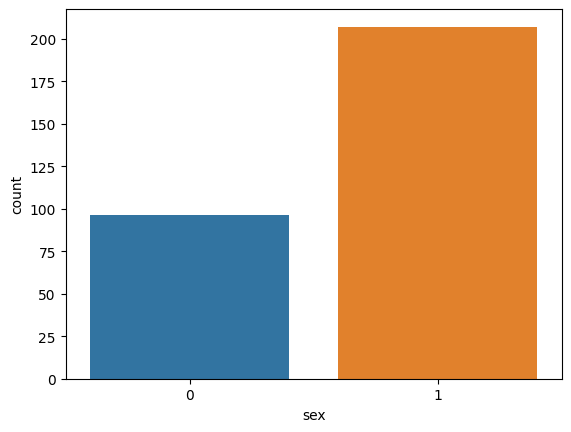

In [13]:
sns.countplot(x="sex",data=df)

In [18]:
cp_df=df["cp"].value_counts().reset_index()
cp_df["index"][0]="Typical Angima"
cp_df["index"][1]="ATypical Angima"
cp_df["index"][2]="Non Anginal"
cp_df["index"][3]="No symptoms"
print(cp_df)

             index   cp
0   Typical Angima  143
1  ATypical Angima   87
2      Non Anginal   50
3      No symptoms   23


<Axes: xlabel='index', ylabel='cp'>

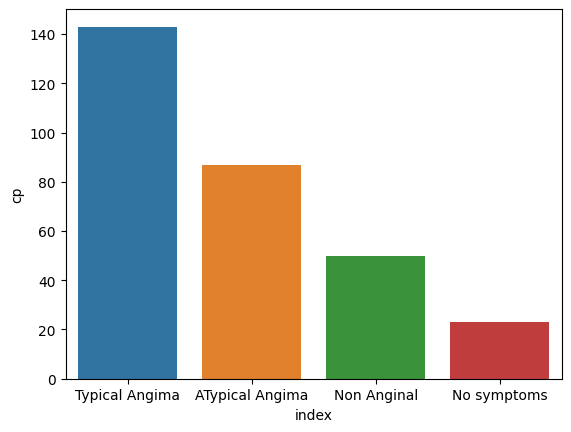

In [19]:
sns.barplot(x="index",y="cp",data=cp_df)

##Bivariate Analysis

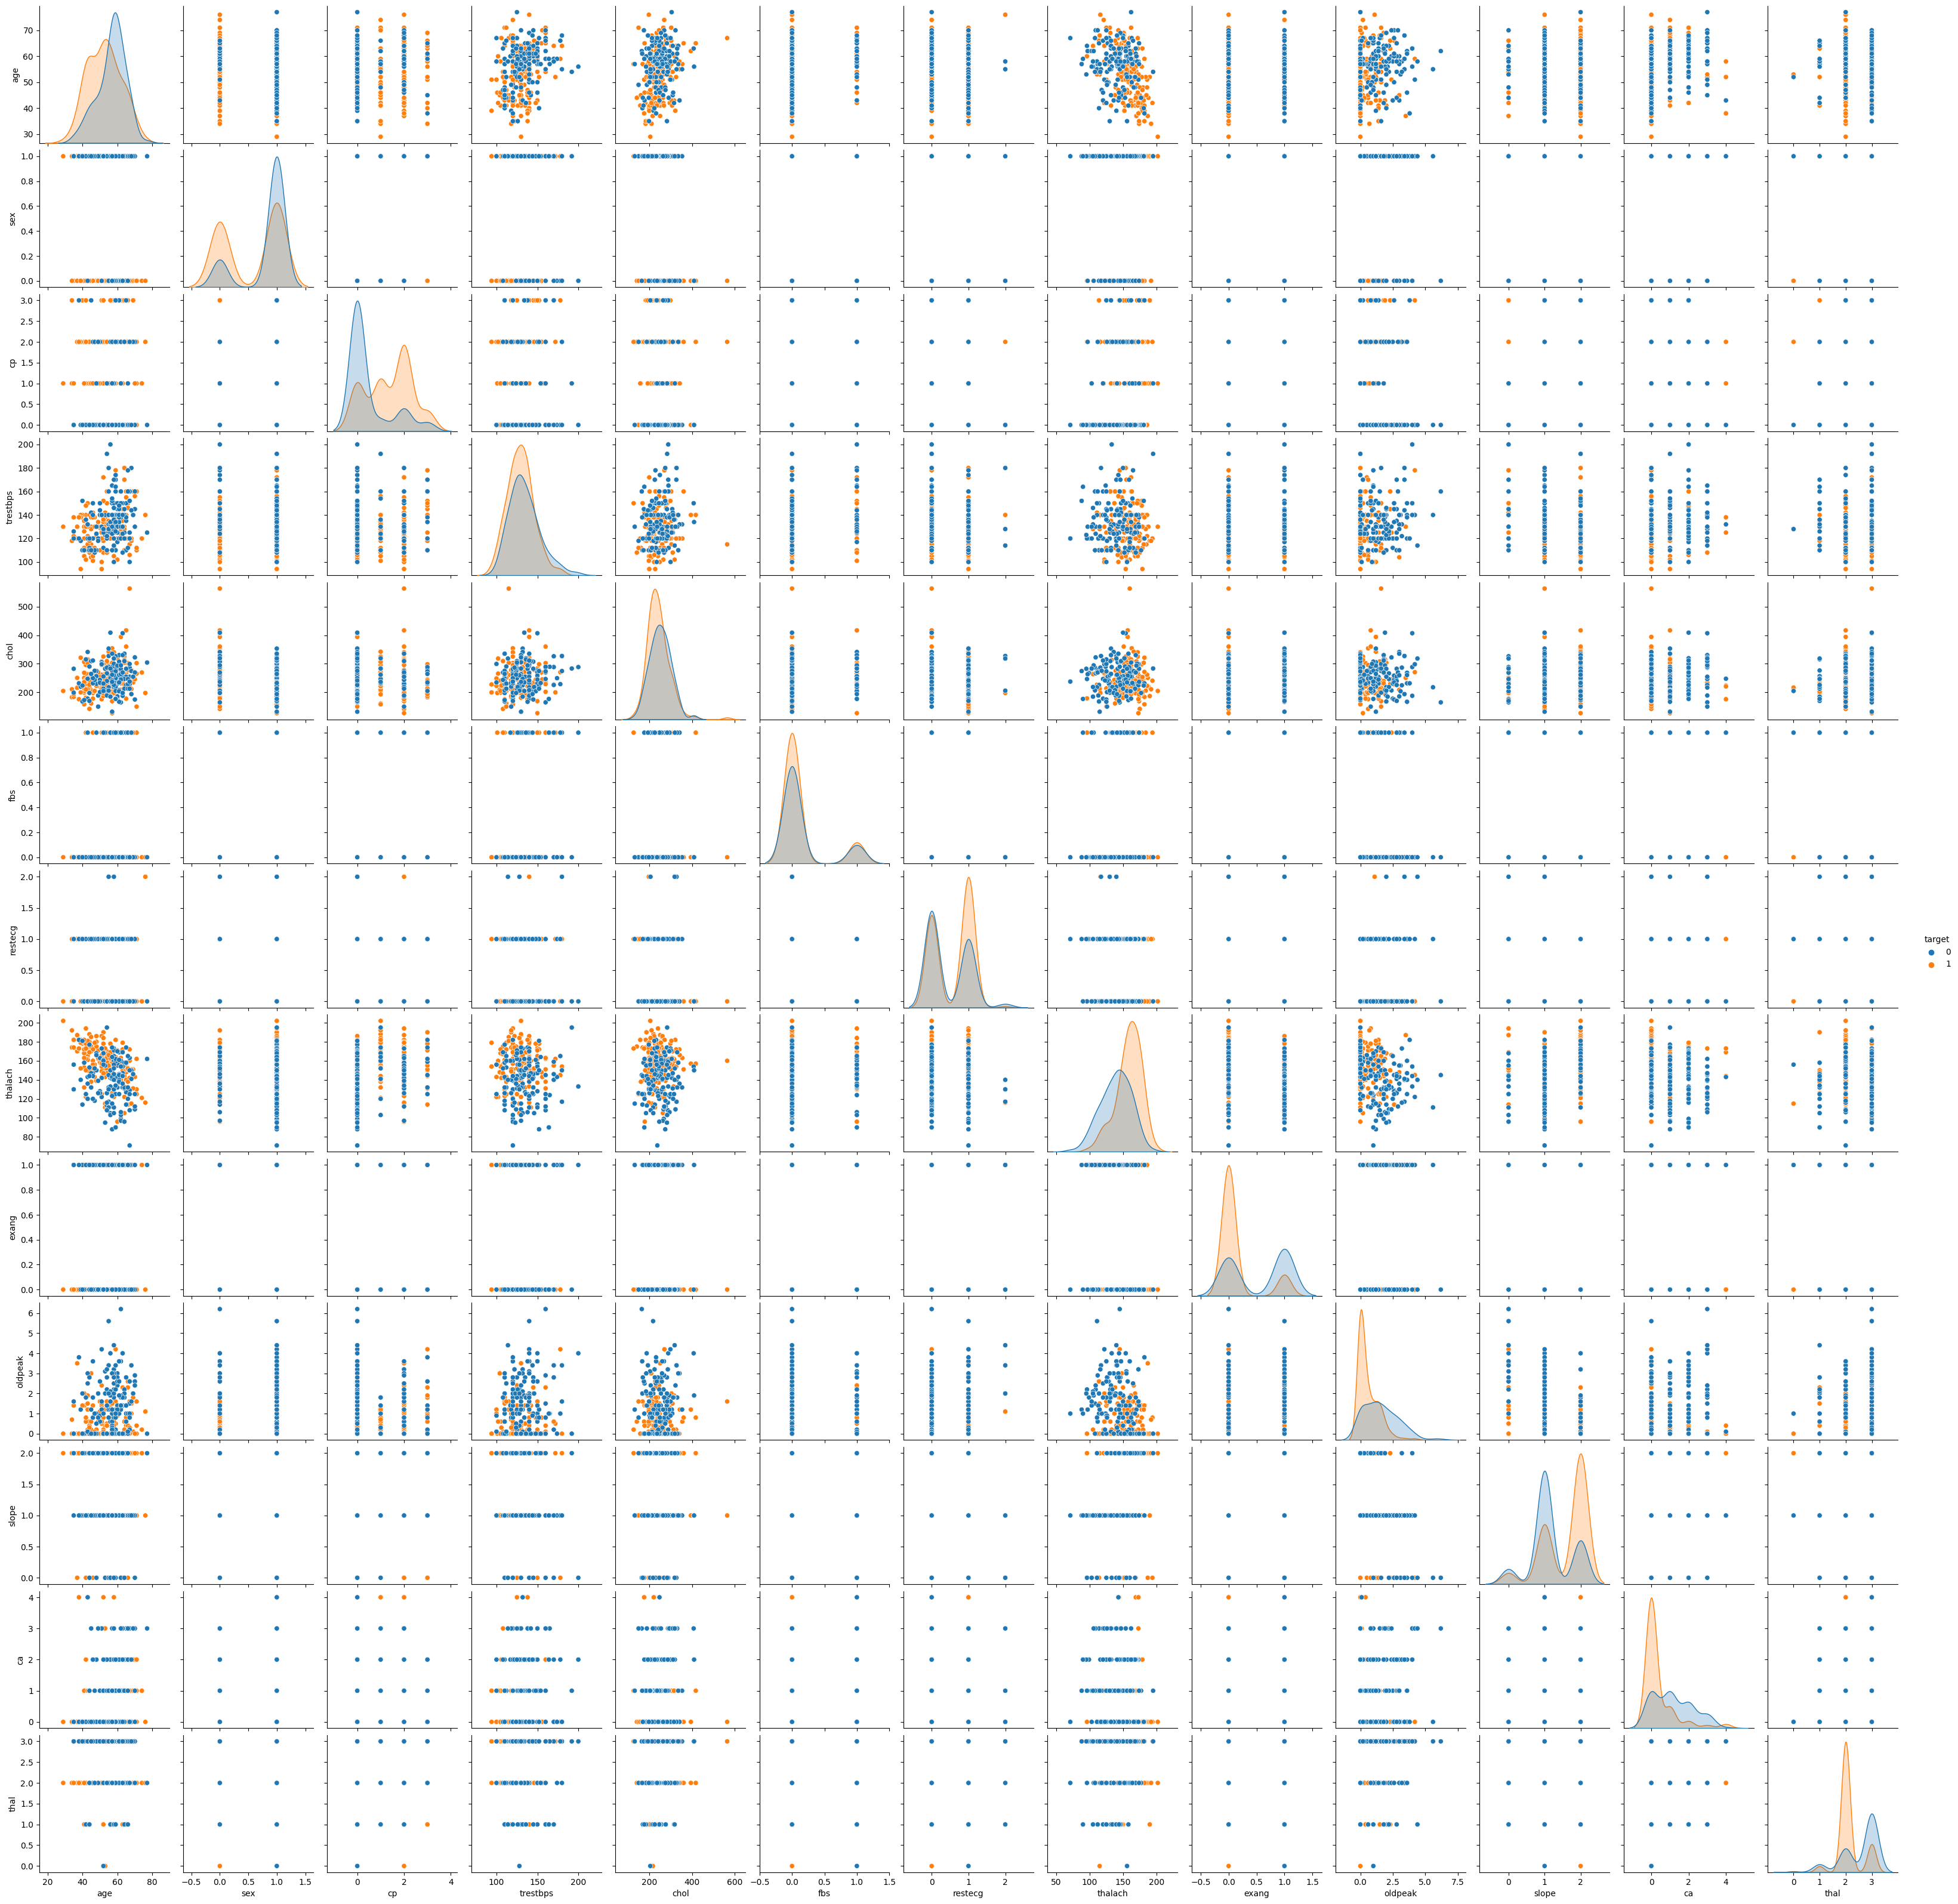

In [22]:
sns.pairplot(df,hue="target")

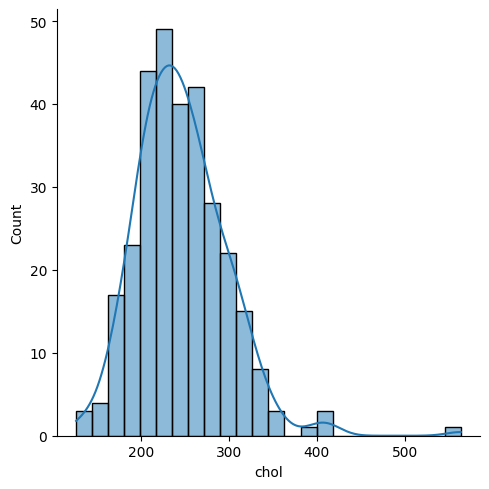

In [26]:
sns.displot(df["chol"],kde=True)

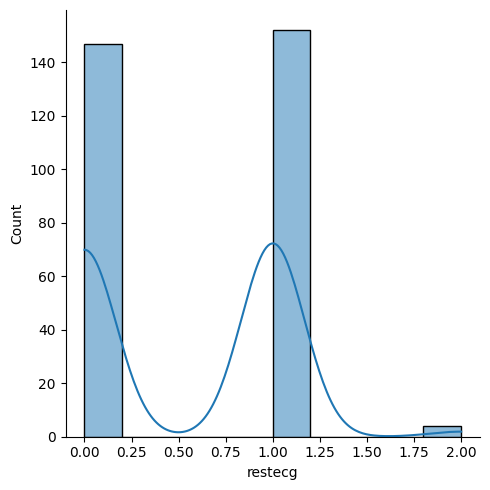

In [27]:
sns.displot(df["restecg"],kde=True)

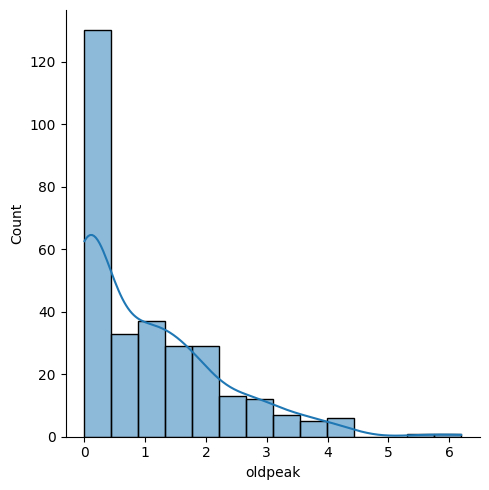

In [28]:
sns.displot(df["oldpeak"],kde=True)

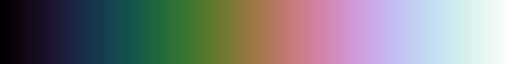

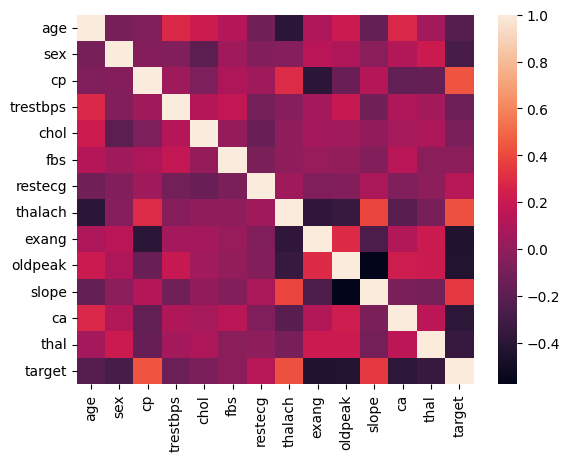

In [10]:
sns.heatmap(df.corr())
sns.color_palette("cubehelix", as_cmap=True)

In [33]:
sc=StandardScaler()
sc.fit(df)

StandardScaler()

In [37]:
df=sc.transform(df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
df=pd.DataFrame(df,columns=['age','sex','cp','trestbps','chol','fbs','restecg',"thalach","exang","oldpeak","slope","ca","thal","target"])

In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [55]:
y=LabelEncoder().fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Decision Tree Classifier

In [50]:
dtc=DecisionTreeClassifier()

In [57]:
dtc.fit(x_train,y)

DecisionTreeClassifier()

In [59]:
y_pred=dtc.predict(x_test)

In [60]:
y2=LabelEncoder().fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
accuracy_score(y2,y_pred)

0.8524590163934426

In [64]:
report = classification_report(y2, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



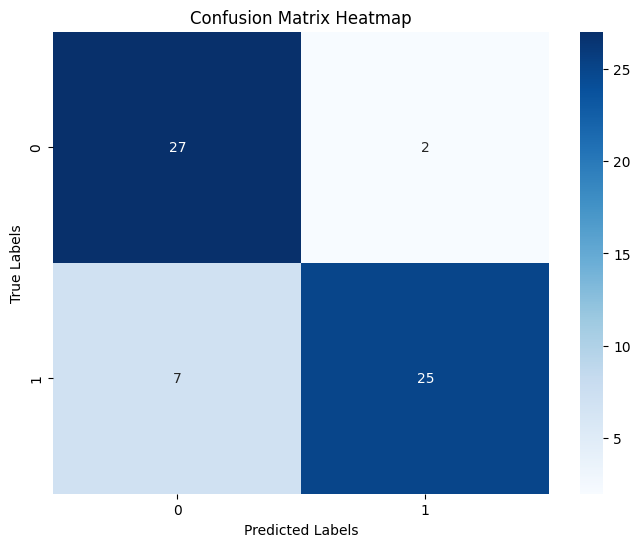

In [67]:
cm = confusion_matrix(y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()